In [1]:
%matplotlib widget

# Imports
from ctraptools.kymos.detect import Detector
from ctraptools.kymos.interactive import FrameRangeSelector
from lumicks import pylake

import ctraptools.kymos.io as kio
import numpy as np
import tifffile

In [2]:
# Parameters
filepath = "/Users/sc13967/Documents/People/Alex Hughes-Games/2023-12-11 Binding rebinding/EcoP15I sliding diffusion/"
filename = "20230512-150855 Kymograph 4 into 4 mM ATP sliding"
extension = "h5"
channel = 0

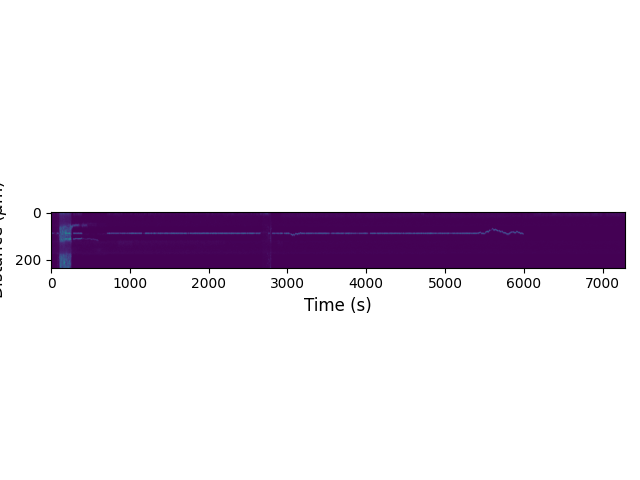

In [5]:
# Getting kymograph
file = pylake.File(filepath+filename+"."+extension)
kymo = next(iter(file.kymos.values()))

frs = FrameRangeSelector(kymo,px_min=0,px_max=50)

In [6]:
(range_min,range_max) = frs.get_range()

image = kymo.get_image()[:,range_min:range_max,channel]

fr_str = "fr"+str(range_min)+"-"+str(range_max)
tifffile.imwrite(
            filepath+filename+"_"+fr_str+"_raw.tif", 
            kymo.get_image().astype(np.single)
        )

In [7]:
# Detecting tracks
detector = Detector(half_t_w=0,peak_det_thresh = 12, n_max=5, c_ub=6, c_def=4, max_dist=6,max_frame_gap=50, min_track_length = 100, min_track_density=0.5, track_heritage_weight=100)
tracks = detector.detect(image)

100%|██████████| 2158/2158 [00:03<00:00, 559.64it/s]


In [5]:
# Saving files
kio.write_peak_traces(tracks,filepath+filename+"_"+fr_str+'_C'+str(channel)+"_traces")
kio.save_overlay(tracks,image,filepath+filename+"_"+fr_str+'_C'+str(channel)+"_overlay")


In [6]:
# Estimating noise in position
# track = next(tracks.values().__iter__())

# x = track.get_positions()[0:1000]

# x_std = np.std(x)

In [7]:
link_dist = 2

for track in tracks.values():
    prob = track.calculate_stationary_probability(image.shape)

    tifffile.imwrite(filepath+filename+"_"+fr_str+"_track"+str(track.ID)+"_prob.tif", prob.astype(np.single))
    